# Lecture 23 - Evaluating ML models: Metrics for Regression and Classification

#### Announcements

* Reminder: Lab 7 is due Sunday 11/30; no late penalty applied before 10pm Wednesday 12/3; no submissions accepted after that (not even via slip days)
  
  
#### Goals
* Know how to think about errors regression problems, and a few ways they can be measured.
    * Regression: absolute, relative, squared; MSE, RMSE, MAE, coefficient of determination
    * Binary Classification: accuracy, precision, recall, F-score
    * Multiclass classification: acccuracy, precision, recall, 

# So you've made some predictions. How good are they? 

## Regression Metrics

Let's consider **regression** first. Our model is some function that maps an input datapoint to a numerical value:

$y_i^\mathrm{pred} = f(x_i)$

and we have a ground-truth value $y_i^\mathrm{true} $for $x_i$.

How do we measure how wrong we are?
* **Error** is pretty simple to define:

    $y_i^\mathrm{true} - y_i^\mathrm{pred}$


* But we want to evaluate our model on the whole train or val set. **Average error** is a bad idea:

    $\sum_i y_i^\mathrm{true} - y_i^\mathrm{pred}$
    
    
* **Absolute error** solves this problem:
    
    $|y_i^\mathrm{true} - y_i^\mathrm{pred}|$
    
   
* **Mean absolute error** measures performance on a whole train or val set:

    $\frac{1}{n} \sum_i |y_i^\mathrm{true} - y_i^\mathrm{pred}$|
    

* **Squared error** disproportionately punishes larger errors. This may be desirable or not.

    $\sum_i \left(y_i^\mathrm{true} - y_i^\mathrm{pred}\right)^2$


* **Mean squared error (MSE)** does the same over a collection of training exaples:

    $\frac{1}{n} \sum_i \left(y_i^\mathrm{true} - y_i^\mathrm{pred}\right)^2$
    

* MSE becomes more interpretable if you square-root it, because now it's in the units of the input. This gives us **Root Mean Squared Error (RMSE)**:

    $\sqrt{ \frac{1}{n} \sum_i \left(y_i^\mathrm{true} - y_i^\mathrm{pred}\right)^2}$

**Problem** with any of the above:

You can make your error metric go as small as you want! Just scale the data:
$$ X \leftarrow X / k $$
$$ \mathbf{y}^\mathrm{true} \leftarrow \mathbf{y}^\mathrm{true} / k $$
$$ \mathbf{y}^\mathrm{pred} \leftarrow \mathbf{y}^\mathrm{pred} / k $$

**Also**:
  Is 10 vs 12 is a bigger error than 1 vs 2?

**Solutions**:
* **Relative error**:

    $|y_i^\mathrm{true} - y_i^\mathrm{pred}|$

* Coefficient of determination:
    
    * Let $\bar{y}$ be the mean of $\mathbf{y}^\mathrm{true}$.
    * Let $SS_\mathrm{tot} = \sum_i \left(y_i^\mathrm{true} - \bar{y}\right)$.
    * Let $SS_\mathrm{res} = \sum_i \left(y_i^\mathrm{true} - y_i^\mathrm{pred}\right)$.
    * Then the **coefficient of determination** is:
    $1 - \frac{SS_\mathrm{res}}{SS_\mathrm{tot}}$
    
    * This is:
        * 0 if you predict the mean
        * 1 if you're perfect
        * negative if you do worse than the mean-prediction baseline!

## Classification Metrics

Evaluating binary classification is trickier than regression, and the reason is that most intuitive metrics can be gamed using a well-chosen baseline.

Simplest metric - accuracy: on what % of the examples were you correct?

There are different kinds of right and wrong:
  * TP - True positives (correctly labeled positive)
  * TN - True negatives (correctly labeled negative)
  * FP - False positives (incorrectly labeled positive; was actually negative)
  * FN - False negatives (incorrectly labeled negative; was actually positive)
  

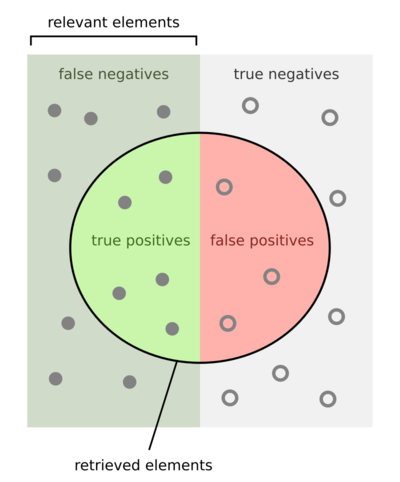

**Exercise**: let TP be the number of true positives, and so on for the other three. Define **accuracy** in terms of these quantities.

**Accuracy** = $\frac{TP + TN}{(TP + TN + FP + FN)}$

**Exercise**: Game this metric. *Hint*: suppose the classes are unbalanced (95% no-tumor, 5% tumor).

Problem: if you just say no cancer all the time, you get 95% accuracy.

Okay, what's **really** important is how often you're right when you *say* it's positive:

**Precision** = $\frac{TP}{(TP + FP)}$

Anything wrong with this?

Problem: incentivizes only saying "yes" when very sure (or never).

Okay, what's **really** important is the fraction of all *real* cancer cases that you correctly identify.

**Recall** = $\frac{TP}{(TP + FN)}$


**Exercise:** Game this metric.

Problem: you get perfect recall if you say everyone has cancer.

Can't we just have one number? Sort of. Here's one that's hard to game:

**F-score** $= 2 *\frac{\textrm{precision } * \textrm{ recall}}{\textrm{precision } + \textrm{ recall}}$

Here's a visual summary (source: Wikipedia):
![](https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/800px-Precisionrecall.svg.png)

## Tuning a Binary Classifier

Sometimes your classifier will have a built-in threshold that you can tune. The simplest example is a simple threshold classifier that says "positive" if a single input feature exceeds some value, and negative otherwise.

Consider trying to predict sex (Male or Female) given height:
![](https://fw.cs.wwu.edu/~wehrwes/courses/data311_23w/lectures/L23/height.png)

If you move the line left or right, you can trade off between error types (FP and FN).

The possibilities in this space of trade-offs can be summarized by plotting FP vs TP:
![](https://fw.cs.wwu.edu/~wehrwes/courses/data311_23w/lectures/L23/height_roc.png)


## Multi-Class Classification

Usually, a multiclass classifier will output a score or probability for each class; the prediction will then be the one with the highest score or probability.

#### Metrics:

* Accuracy - still possible, but random guess baseline gets worse fast, and good accuracy is very hard to get with many classes.
* **Top-k accuracy**: does the correct class lie in the $k$ most likely classes? Easier, and gives "partial credit"
* Precision and recall can be defined for each class:
    * Precision for class $c$: $\frac{\textrm{\# correctly labeled } c}{\textrm{\# labeled class } c}$
    * Recall for class $c$: $\frac{\textrm{\# correctly labeled } c}{\textrm{\# with true label } c}$

The full performance details can be represented using a **confusion matrix**:

![](https://fw.cs.wwu.edu/~wehrwes/courses/data311_23w/lectures/L23/confusion.png)


**Exercises:** 
Given a confusion matrix, how would you calculate:
* the precision for a certain class?
* the recall for a certain class?